In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os




folder_path = '/Users/navyabingi/Downloads/interactions/1'


dataframes = []


for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)  
    dataframes.append(df) 


combined_df = pd.concat(dataframes, ignore_index=True)


#combined_df.to_csv('/Users/navyabingi/Downloads/combined_customer_interactions.csv', index=False)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [19]:
ivr=pd.read_csv("/Users/navyabingi/Downloads/combined_customer_interactions.csv")
ivr

,site_id,account_nbr,customer_key,start_time,end_time,transaction_id,category,product,lob,source_id_num,...,dtl_3_char,dtl_4_num,dtl_4_char,dtl_5_num,dtl_5_char,dtl_6_num,dtl_6_char,last_update_dt,interaction_type_key,dt
0,580,520413804,120438891,2024-11-02 14:05:38,2024-11-02 14:07:13,1_10004018471730556337_594E0999ECDAE3ADEB94078...,COL,U,R,NaN,...,TR,0,TRANSFER,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02
1,216,114840802,65586711,2024-11-02 16:17:40,2024-11-02 16:19:59,1_10004056521730564259_19F0DE95C31CB65C1BA96C6...,TS,D,R,NaN,...,EN,0,HangUp,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02
2,436,0,-2,2024-11-02 11:42:35,2024-11-02 11:44:54,1_10004000191730547754_CE69688CEC4E6F8C88DB7D9...,TS,D,R,NaN,...,TR,0,TRANSFER,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02
3,436,126360804,120882271,2024-11-02 17:46:44,2024-11-02 17:49:01,1_10004089141730569603_967C022C32B9FF578AF4B1A...,SLS,U,R,NaN,...,TR,0,TRANSFER,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02
4,436,215068114,120770819,2024-11-02 02:44:57,2024-11-02 02:51:19,1_10004185961730515496_37438C6021FE1BA8DF8B144...,AS,U,R,NaN,...,EN,0,HangUp,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959933,476,0,-2,2024-11-27 17:57:54,2024-11-27 17:58:53,1_10004333881732730274_FA4583F14CE455AC77ECF40...,SLS,U,R,NaN,...,TR,0,TRANSFER,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27
7959934,186,0,-2,2024-11-27 22:17:23,2024-11-27 22:18:41,1_10004454071732745842_C9AF9B956E605FF7879ED81...,AS,U,R,NaN,...,TR,0,TRANSFER,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27
7959935,580,46443005,110065330,2024-11-27 20:54:28,2024-11-27 20:57:28,1_10004634691732740868_262811F6662AA96B3988522...,AS,U,R,NaN,...,EN,0,HangUp,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27
7959936,541,0,-2,2024-11-27 21:24:14,2024-11-27 21:24:37,1_10004648401732742654_5257BCEAB37A7B1199FDB18...,OTH,U,R,NaN,...,EN,0,HangUp,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27


## Data Cleaning

### Adding new columns + removing outliers

In [20]:
from datetime import datetime

import numpy as np


unique_values = ivr["dtl_2_char"].unique()


categories = {
    'Billing & Payments': ['BILLING', 'PAYMENT', 'BALANCE', 'COLLECTIONS', 'FICO'],
    'Technical Support': ['TECH', 'SUPPORT', 'TROUBLESHOOTING', 'OUTAGE'],
    'Sales & Retention': ['SALES', 'RETENTION', 'MARKETING'],
    'Service Changes': ['CHANGE', 'NEW', 'MOVE'],
    'Appointment & Installation': ['APPOINTMENT', 'INSTALL', 'SELF INSTALL'],
    'Promotions & Campaigns': ['CAMPAIGN', 'PROMOTION', 'OFFER'],
    'Security & Abuse': ['DMCA', 'COMPROMISE', 'ABUSE'],
    'Specialty Services': ['COX MOBILE', 'HOMELIFE', 'GIGABIT', 'WEB HOSTING', 'COX BUSINESS'],
    'Unknown/Other': ['UNKNOWN']
}


def categorize_value(value):
    for category, keywords in categories.items():
        if any(keyword in value for keyword in keywords):
            return category
    return 'Unknown/Other'


category_mapping = {value: categorize_value(value) for value in unique_values}
ivr['Category'] = ivr['dtl_2_char'].map(category_mapping)


ivr['start_time'] = pd.to_datetime(ivr['start_time'])
ivr['end_time'] = pd.to_datetime(ivr['end_time'])


ivr['duration'] = (ivr['end_time'] - ivr['start_time']).dt.total_seconds()/60


ivr['hour'] = ivr['start_time'].dt.hour

Q1 = ivr['duration'].quantile(0.25)  # 25th percentile
Q3 = ivr['duration'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                       # Interquartile range


upper_bound = Q3 + 1.5 * IQR


ivr = ivr[ivr['duration'] <= upper_bound]
ivr[ivr['Category']=='Technical Support']


,site_id,account_nbr,customer_key,start_time,end_time,transaction_id,category,product,lob,source_id_num,...,dtl_5_num,dtl_5_char,dtl_6_num,dtl_6_char,last_update_dt,interaction_type_key,dt,Category,duration,hour
2,436,0,-2,2024-11-02 11:42:35,2024-11-02 11:44:54,1_10004000191730547754_CE69688CEC4E6F8C88DB7D9...,TS,D,R,NaN,...,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02,Technical Support,2.316667,11
8,436,0,-2,2024-11-02 01:21:20,2024-11-02 01:23:09,1_10004170351730510479_8752FC42B9A668680A873E8...,TS,C,R,NaN,...,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02,Technical Support,1.816667,1
20,182,53506415,109183252,2024-11-02 11:43:36,2024-11-02 11:46:29,1_10004230821730547816_82A9C6BA68ECC3B531A33C2...,TS,C,R,NaN,...,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02,Technical Support,2.883333,11
23,476,87629512,120986470,2024-11-02 00:07:36,2024-11-02 00:09:52,1_10004381431730506055_2120E38D94B6B0049DEC88E...,TS,D,R,NaN,...,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02,Technical Support,2.266667,0
25,126,70293306,57718126,2024-11-02 20:27:50,2024-11-02 20:29:29,1_10004376761730579269_234C6AE409F84615699CAC1...,TS,H,R,NaN,...,NaN,NaN,NaN,NaN,2024-11-30 15:19:07.370,1,2024-11-02,Technical Support,1.650000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959884,238,0,-2,2024-11-27 19:21:41,2024-11-27 19:23:56,1_10004146481732735300_E273C1620C41FD71B2A92D8...,TS,C,R,NaN,...,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27,Technical Support,2.250000,19
7959895,436,171083002,-2,2024-11-27 22:17:37,2024-11-27 22:19:59,1_10004009671732745856_9435DEA54E13F294F56A7C7...,TS,C,R,NaN,...,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27,Technical Support,2.366667,22
7959907,131,61885903,100416637,2024-11-27 17:52:08,2024-11-27 17:55:58,1_10004546841732729926_6572879E2BFAB307A6EF0D6...,TS,C,R,NaN,...,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27,Technical Support,3.833333,17
7959908,436,501000803,118882742,2024-11-27 18:31:19,2024-11-27 18:33:11,1_10004566161732732278_03B3DAB8911B86E68AA7350...,TS,D,R,NaN,...,NaN,NaN,NaN,NaN,2024-12-20 15:21:04.130,1,2024-11-27,Technical Support,1.866667,18


### Removing Unnecessary Columns

In [20]:
ivr.columns

Index(['site_id', 'account_nbr', 'customer_key', 'start_time', 'end_time',
       'transaction_id', 'category', 'product', 'lob', 'source_id_num',
       'source_id_char', 'dtl_1_num', 'dtl_1_char', 'dtl_2_num', 'dtl_2_char',
       'dtl_3_num', 'dtl_3_char', 'dtl_4_num', 'dtl_4_char', 'dtl_5_num',
       'dtl_5_char', 'dtl_6_num', 'dtl_6_char', 'last_update_dt',
       'interaction_type_key', 'dt', 'Category', 'duration', 'hour'],
      dtype='object')

### Trend Analysis of IVR Interactions

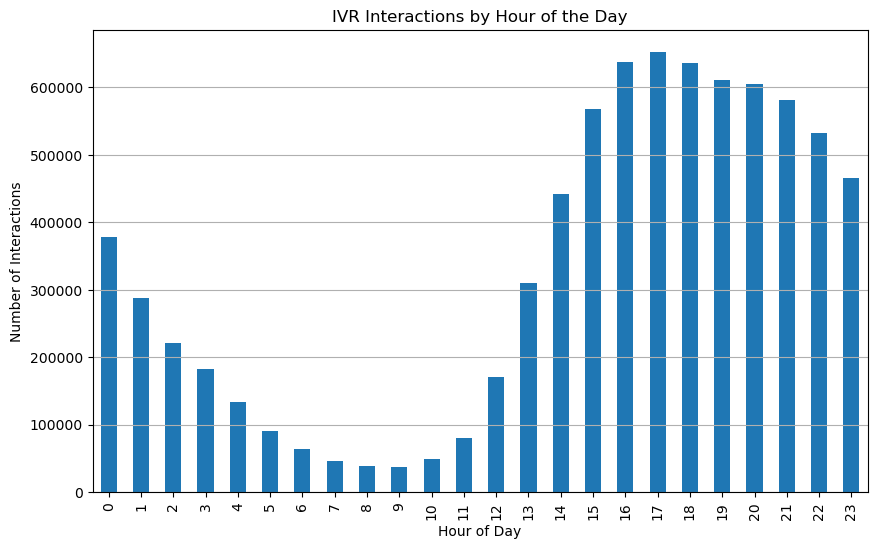

In [5]:

plt.figure(figsize=(10, 6))
ivr['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('IVR Interactions by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.grid(axis='y')
plt.show()


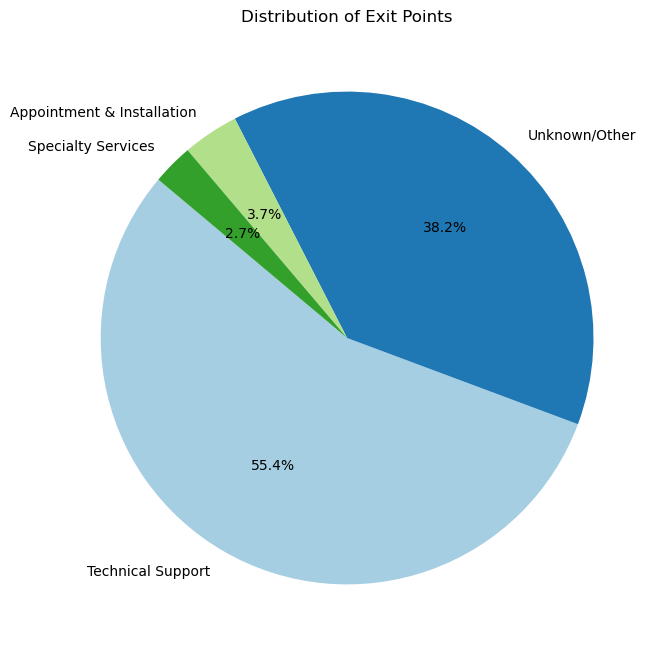

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [23]:
import seaborn as sns
my=ivr[ivr['hour'].between(14, 24)]
my=my[(my['category']=="TS")]
my=my[(my['product']=='C') | (my['product']=='D')]
#my=my[my['Category']=='Technical Support']

category_counts = my['Category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Exit Points')
plt.show()

pivot_table = ivr.pivot_table(index='Category', columns='lob', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', linewidths=0.5)


### Category Breakdown of Interactions

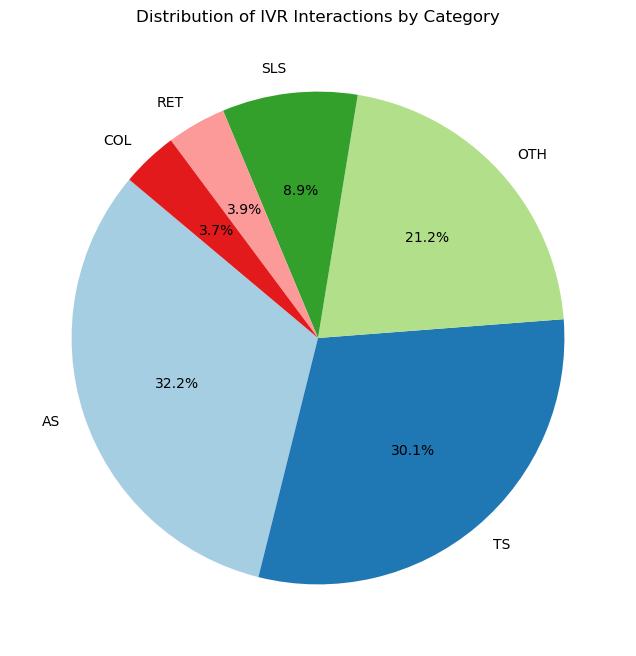

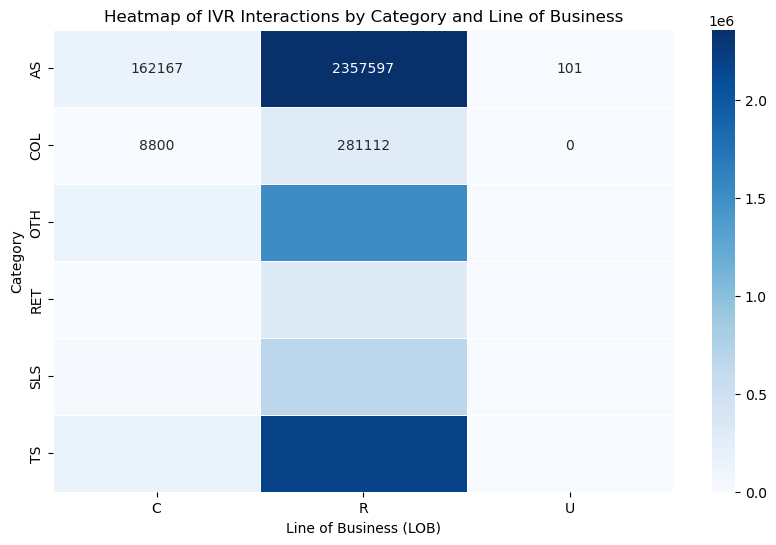

In [6]:
import seaborn as sns
category_counts = ivr['category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of IVR Interactions by Category')
plt.show()

pivot_table = ivr.pivot_table(index='category', columns='lob', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Heatmap of IVR Interactions by Category and Line of Business')
plt.xlabel('Line of Business (LOB)')
plt.ylabel('Category')
plt.show()

### 

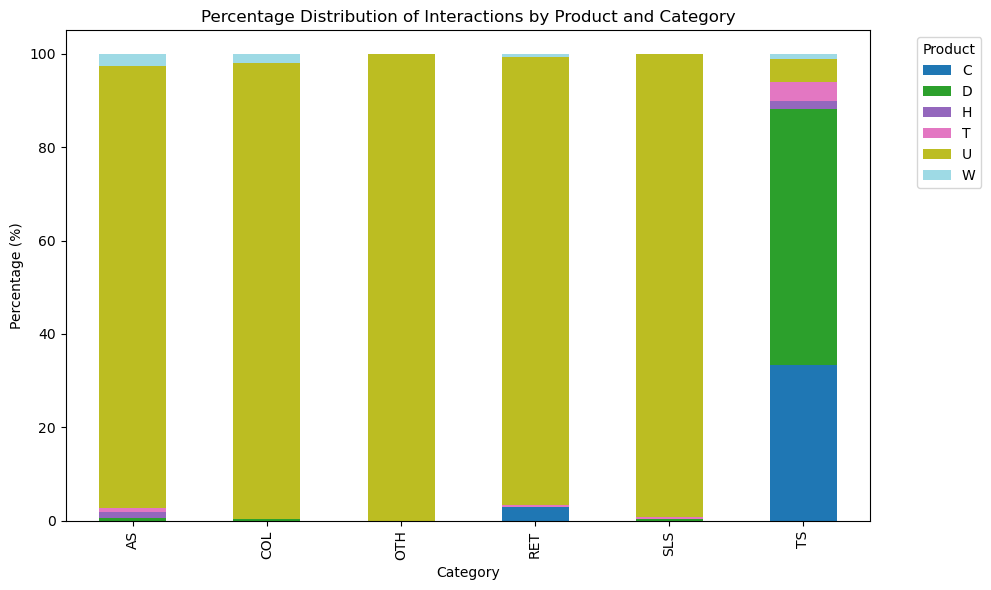

In [7]:
cp_counts = ivr.groupby(['category', 'product']).size().unstack(fill_value=0)


cp_percentage = cp_counts.div(cp_counts.sum(axis=1), axis=0) * 100

cp_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')


plt.title("Percentage Distribution of Interactions by Product and Category")
plt.xlabel("Category")
plt.ylabel("Percentage (%)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the chart
plt.tight_layout()
plt.show()

### Anomalous Interaction Patterns

/var/folders/07/x70ljvm93m560gppmb89gmmw0000gn/T/ipykernel_1263/1312879992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivr['start_time'] = pd.to_datetime(ivr['start_time'])
/var/folders/07/x70ljvm93m560gppmb89gmmw0000gn/T/ipykernel_1263/1312879992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivr['Hour'] = ivr['start_time'].dt.hour
/var/folders/07/x70ljvm93m560gppmb89gmmw0000gn/T/ipykernel_1263/1312879992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

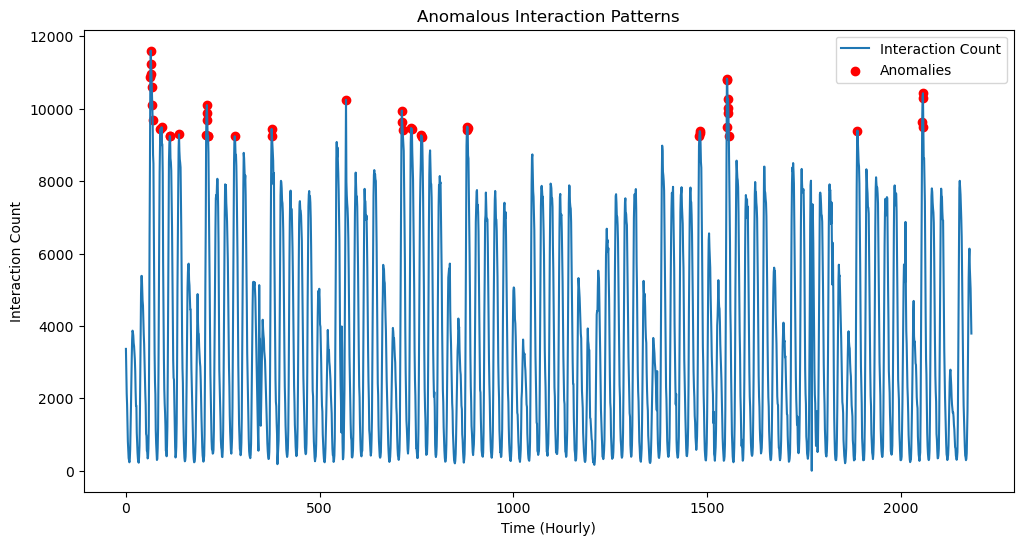

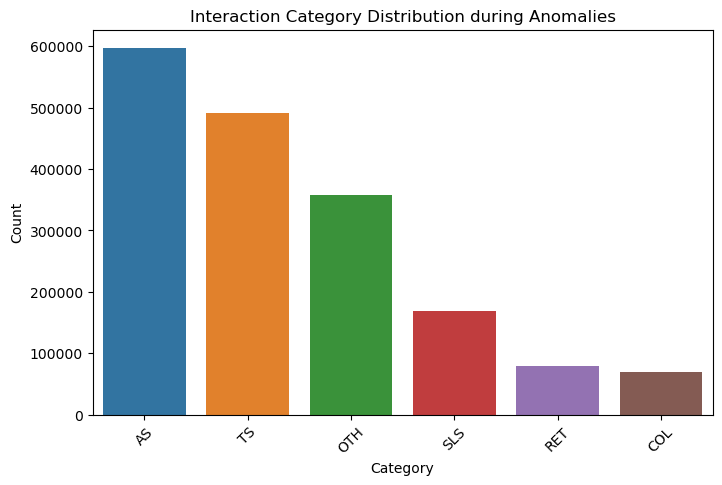

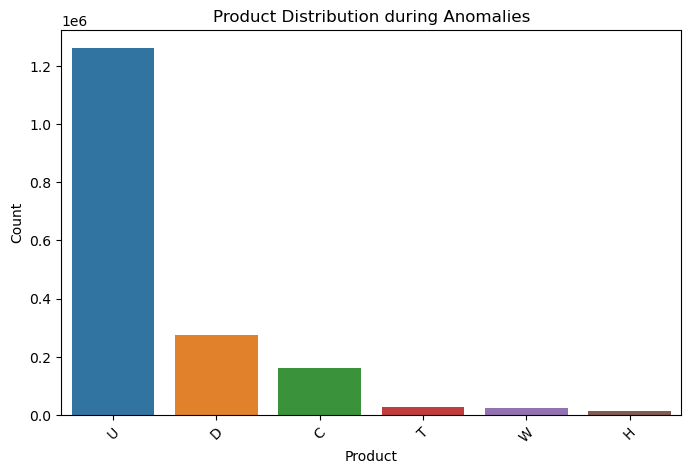

In [8]:
from scipy.stats import zscore
ivr['start_time'] = pd.to_datetime(ivr['start_time'])

ivr['Hour'] = ivr['start_time'].dt.hour
ivr['Date'] = ivr['start_time'].dt.date


interaction_counts = ivr.groupby(['Date', 'Hour']).size().reset_index(name='Interaction_Count')


interaction_counts['Z_Score'] = zscore(interaction_counts['Interaction_Count'])


anomalies = interaction_counts[interaction_counts['Z_Score'].abs() > 2]


plt.figure(figsize=(12, 6))
plt.plot(interaction_counts['Interaction_Count'], label='Interaction Count')
plt.scatter(anomalies.index, anomalies['Interaction_Count'], color='red', label='Anomalies')
plt.xlabel('Time (Hourly)')
plt.ylabel('Interaction Count')
plt.title('Anomalous Interaction Patterns')
plt.legend()
plt.show()


anomalous_dates = anomalies['Date'].unique()
anomalous_interactions = ivr[ivr['start_time'].dt.date.isin(anomalous_dates)]


plt.figure(figsize=(8, 5))
sns.countplot(data=anomalous_interactions, x='category', order=anomalous_interactions['category'].value_counts().index)
plt.title('Interaction Category Distribution during Anomalies')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(data=anomalous_interactions, x='product', order=anomalous_interactions['product'].value_counts().index)
plt.title('Product Distribution during Anomalies')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [41]:
# One-hot encode
ivr= pd.get_dummies(ivr, columns=['category', 'product', 'lob','dtl_3_char','dtl_4_char','Category'], dtype=int)

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_use = [
    'duration', 'hour', 
    'category_AS', 'category_COL', 'category_OTH', 'category_RET', 'category_SLS', 'category_TS', 
    'product_C', 'product_D', 'product_H', 'product_T', 'product_U', 'product_W', 
    'lob_C', 'lob_R', 'lob_U', 'dtl_4_num','Category_Account Management', 'Category_Appointment Scheduling',
       'Category_Billing', 'Category_Collections',
       'Category_Customer Interaction', 'Category_Customer Support',
       'Category_Data Services', 'Category_Home Services',
       'Category_Installation', 'Category_Internet Services',
       'Category_Marketing', 'Category_New Customer', 'Category_Non-Customer',
       'Category_Order Processing', 'Category_Outage', 'Category_Pending',
       'Category_Phone Services', 'Category_Retail Services',
       'Category_Retention', 'Category_Risk Management', 'Category_Sales',
       'Category_Security', 'Category_Service Activation',
       'Category_Service Change', 'Category_Service Status',
       'Category_Technical Support', 'Category_Telephone Services',
       'Category_Telephony Services', 'Category_Unknown',
       'Category_Video Services']


df_filtered = ivr[columns_to_use]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_outliers = iso_forest.fit_predict(df_scaled)

ivr['iso_outlier'] = iso_outliers
ivr['iso_outlier'] = ivr['iso_outlier'].apply(lambda x: 'Outlier' if x == -1 else 'Normal')


plt.figure(figsize=(10, 5))
sns.countplot(x='iso_outlier', data=ivr)
plt.title('Isolation Forest Outlier Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=ivr, x='hour', y='duration', hue='iso_outlier', palette='coolwarm')
plt.title('Isolation Forest Outliers (Duration vs. Hour)')
plt.show()


KeyboardInterrupt: 

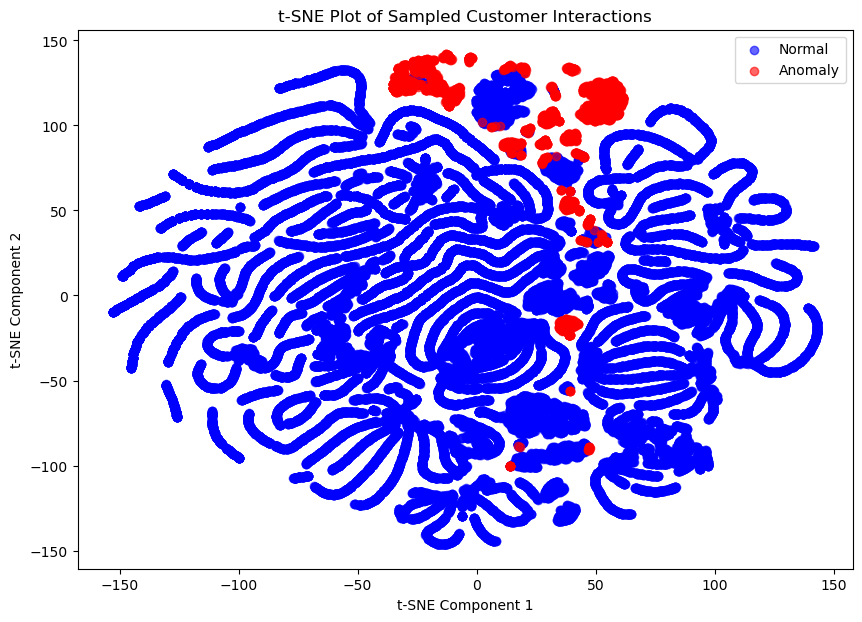

In [8]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



columns_to_use = [
    'duration', 'hour', 'category_AS', 'category_COL', 'category_OTH',
    'category_RET', 'category_SLS', 'category_TS', 'product_C', 'product_D',
    'product_H', 'product_T', 'product_U', 'lob_C', 'lob_R', 'lob_U'
]
df_filtered = ivr[columns_to_use]

df_sample = df_filtered.sample(n=50000, random_state=42)


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample)


iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(df_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_tsne[anomaly_labels == 1, 0], df_tsne[anomaly_labels == 1, 1], 
            c='blue', label='Normal', alpha=0.6)
plt.scatter(df_tsne[anomaly_labels == -1, 0], df_tsne[anomaly_labels == -1, 1], 
            c='red', label='Anomaly', alpha=0.6)
plt.title('t-SNE Plot of Sampled Customer Interactions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()